In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# Load Data

In [2]:
data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_digit = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
sample = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")

In [3]:
y = data["label"]
print(type(y))

<class 'pandas.core.series.Series'>


In [4]:
y = y.to_numpy()
print(y)

[1 0 1 ... 7 6 9]


In [5]:
X = data.drop(columns=['label'])
X = X.to_numpy()

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  18  30 137 137
 192  86  72   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  13  86 250 254 254 254 254 217 246 151  32   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  16 179 254 254 254
 254 254 254 254 254 254 231  54  15   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  72 254 254 254 254 254 254 254 254 254 254 254 254
 104   0   0   0   0   0   0   0   0   0   0   0   0   0  61 191 254 254
 254 254 254 109  83 199 254 254 254 254 243  85   

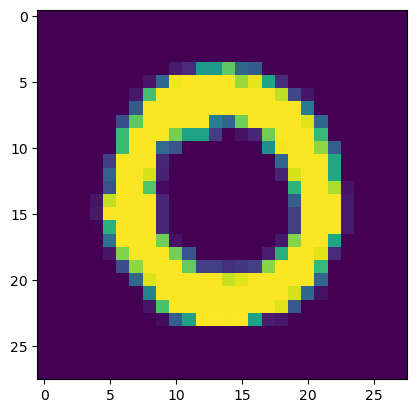

In [6]:
print(X[1])
print(plt.imshow(X[1].reshape(28,28,1)))

In [7]:
X.shape

(42000, 784)

# Normalize the pixel value

In [8]:
X = X/255.0

In [9]:
X.shape

(42000, 784)

# Tranform to (28,28,1)

In [10]:
def tranform(x):
    x_reshape = []
    for e in x:
        x_reshape.append(e.reshape(28,28,1))
    x_reshape = np.array(x_reshape)
    return x_reshape

In [11]:
X = tranform(X)
print(X.shape)

(42000, 28, 28, 1)


In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')== 1.00):
      print("\nReached 100% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [14]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [15]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [16]:
# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Train the model
print(f'\nMODEL TRAINING:')
model.fit(X_train, y_train, epochs=10, callbacks=[callbacks])


MODEL TRAINING:
Epoch 1/10
880/880 [==============================] - 18s 19ms/step - loss: 0.2349 - accuracy: 0.9298
Epoch 2/10
880/880 [==============================] - 16s 18ms/step - loss: 0.0723 - accuracy: 0.9774
Epoch 3/10
880/880 [==============================] - 16s 18ms/step - loss: 0.0481 - accuracy: 0.9840
Epoch 4/10
880/880 [==============================] - 16s 18ms/step - loss: 0.0359 - accuracy: 0.9882
Epoch 5/10
880/880 [==============================] - 16s 18ms/step - loss: 0.0280 - accuracy: 0.9904
Epoch 6/10
880/880 [==============================] - 16s 18ms/step - loss: 0.0206 - accuracy: 0.9935
Epoch 7/10
880/880 [==============================] - 16s 18ms/step - loss: 0.0180 - accuracy: 0.9937
Epoch 8/10
880/880 [==============================] - 16s 18ms/step - loss: 0.0134 - accuracy: 0.9955
Epoch 9/10
880/880 [==============================] - 16s 18ms/step - loss: 0.0117 - accuracy: 0.9961
Epoch 10/10
880/880 [==============================] - 16s 18ms/s

In [18]:
model.evaluate(X_valid, y_valid)

434/434 [==============================] - 3s 6ms/step - loss: 0.0475 - accuracy: 0.9882


[0.04750846326351166, 0.9882395267486572]

In [19]:
test_digit = tranform(test_digit.to_numpy())
prediction_digit = model.predict(test_digit)

875/875 [==============================] - 5s 6ms/step


In [20]:
pr = []
for e in prediction_digit:
    pr.append(np.argmax(e))

In [21]:
submission = pd.DataFrame({"ImageId": sample["ImageId"] ,"Label": pr})

submission.to_csv('/kaggle/working/submission.csv', index=False)

print("Submission saved")

Submission saved
